In [1]:
#%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import date
import openweathermapy.core as owm
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
# Output files (PNG)
temp_file="output_data/temp_graph.png"
humidity_file="output_data/humidity_graph.png"
cloud_file="output_data/cloud_graph.png"
wind_file="output_data/wind_graph.png"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
#date for labeling graphs
today=str(date.today())

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


627

## Perform API Calls

In [3]:
# OpenWeatherMap url = "http://api.openweathermap.org/data/2.5/weather?"
# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": api_key}
summary=["name","id","coord.lat","wind.speed","main.temp","main.humidity","clouds.all"]


In [4]:
summary_data=[]
for city in cities:
    try:
        current_weather=owm.get_current(city, **settings)
        city_data=current_weather(*summary)
        summary_data.append(city_data)
        print(f"Processing {current_weather['name']} with id {current_weather['id']} ")        
    except:
        print(f"{city} not found")

#convert to dataframe and name columns        
summary_df=pd.DataFrame(summary_data)
summary_df=summary_df.rename(columns={0:"name",1:"id",2:"lat",3:"windspeed",4:"temp",5:"humidity",6:"cloudiness"})
#save to file
summary_df.to_csv(output_data_file,index=False,header=True)
#confirm sufficient count after cities found
summary_df.count()

Processing Bluff with id 2175403 
Processing Vila Velha with id 6320062 
Processing Biak with id 1637001 
Processing Mataura with id 6201424 
Processing Dingle with id 1714733 
Processing Port Elizabeth with id 4501427 
Processing Orlovskiy with id 514796 
Processing Albany with id 5106834 
Processing Grand Gaube with id 934479 
Processing Krabi with id 1152633 
Processing Butaritari with id 2110227 
Processing Guiberoua with id 2287970 
Processing Punta Arenas with id 3874787 
Processing Gat with id 2249901 
Processing Port-Cartier with id 6111696 
Processing Townsville with id 2146142 
Processing Bogorodskoye with id 2126638 
Processing Sibolga with id 1213855 
Processing Vaini with id 1273574 
Processing Idritsa with id 557588 
Processing Bredasdorp with id 1015776 
Processing Rikitea with id 4030556 
palabuhanratu not found
Processing Kodiak with id 4407665 
Processing Pevek with id 2122090 
Processing Makakilo City with id 5850554 
Processing Chokurdakh with id 2126123 
Processing

Processing Carlyle with id 5917262 
Processing Pyshchug with id 503401 
Processing Dombarovskiy with id 565407 
Processing Aitape with id 2101169 
Processing Upata with id 3625710 
Processing San Patricio with id 3437029 
Processing Kahului with id 5847411 
Processing Chumikan with id 2025256 
Processing Surt with id 2210554 
Processing Vardo with id 4372777 
Processing Saint-Louis with id 2978742 
Processing Roebourne with id 2062276 
Processing Solnechnyy with id 2016307 
Processing Xichang with id 1789647 
Processing Iquique with id 3887127 
Processing Glotovka with id 561179 
Processing Port Hedland with id 2063042 
Processing Alice Springs with id 2077895 
Processing Bandarbeyla with id 64814 
Processing Santo Antonio do Leverger with id 3449502 
Processing La Asuncion with id 3652350 
Processing Tilichiki with id 2120591 
Processing Kayankulam with id 1267360 
Processing Ayagoz with id 1525988 
Processing Lakes Entrance with id 2160735 
Processing Talcher with id 1255143 
Process

Processing Verkhnevilyuysk with id 2013639 
Processing Hamina with id 659169 
Processing Onda with id 2513115 
Processing Nizhneangarsk with id 2019199 
Processing Sawakin with id 367544 
Processing Taoudenni with id 2450173 
buqayq not found
Processing Tieli with id 2034440 
Processing Jalu with id 86049 
Processing Robore with id 3444176 
Processing Pop with id 1513023 
Processing Buchanan with id 2278158 
Processing Huilong with id 1795424 
Processing Kriva Palanka with id 789045 
babanusah not found
kuche not found
Processing Mogadishu with id 53654 
Processing Lazaro Cardenas with id 3996234 
sataua not found
Processing Bathsheba with id 3374083 
Processing Fare with id 4034496 
Processing Barreirinhas with id 3406196 
Processing Port Augusta with id 2063056 
Processing Hofn with id 2630299 
tumannyy not found
Processing Laguna with id 4013704 
Processing Cartagena del Chaira with id 3792382 
Processing Araouane with id 2460954 
Processing Hobyo with id 57000 
Processing Marsa Mat

name          554
id            554
lat           554
windspeed     554
temp          554
humidity      554
cloudiness    554
dtype: int64

In [5]:
summary_df.head()

,name,id,lat,windspeed,temp,humidity,cloudiness
0,Bluff,2175403,-23.58,7.87,60.94,86,0
1,Vila Velha,6320062,-3.71,19.46,86.00,62,20
2,Biak,1637001,-0.91,5.75,75.79,99,92
3,Mataura,6201424,-46.19,10.22,42.94,82,92
4,Dingle,1714733,11.00,8.88,79.66,73,64


In [6]:
#for all scatter plots
def weather_scat (index,column,y_label,fig_title,outfile_name):
    """
    index determines color graph
    column - str for the column in summary_df to use for y values
    y_label - the y axis label (x_axis is latitude values)
    fig-title - the graph title
    outfile_name -  .png file for saving the graph 
    """
    
    colors=("red","blue","grey","green")
    fig,ax=plt.subplots(figsize=(7,7),facecolor="lightgrey")
    ax.set_facecolor('white')
 #set x axis   
    x_axis=summary_df["lat"]
    ax.set_xlabel("Latitude",fontsize=12)
 #set y axis   
    y_data=summary_df[column]
    ax.set_ylabel(y_label,fontsize=12)
#plot and save to file    
    ax.grid()
    fig.suptitle(fig_title, fontsize=16)
    ax.scatter(x_axis,y_data,marker='o',facecolor=colors[index],edgecolor="black")
    plt.savefig(outfile_name)
    plt.show()
    return

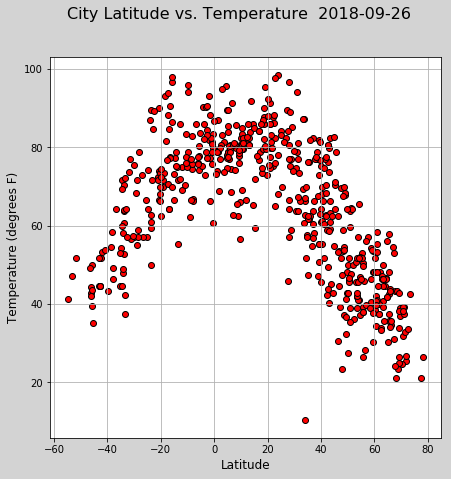

In [7]:
#Temp vs Lat scatterplot
weather_scat(0,"temp","Temperature (degrees F)","City Latitude vs. Temperature  "+today,temp_file)

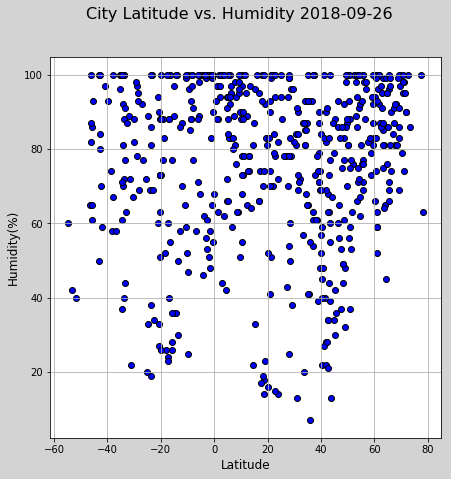

In [8]:
#humidity vs latitude scatterplot
weather_scat(1,"humidity","Humidity(%)","City Latitude vs. Humidity "+today,humidity_file)


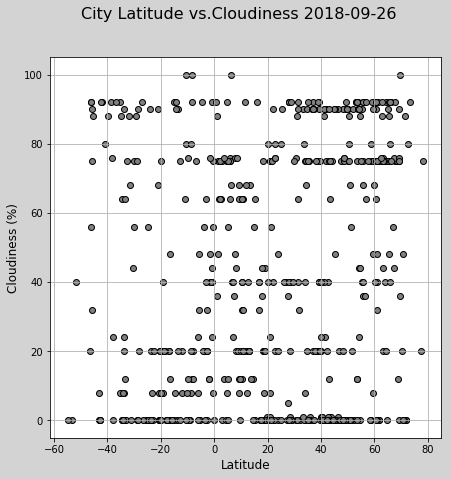

In [9]:
#cloudiness vs latitude
weather_scat(2,"cloudiness","Cloudiness (%)","City Latitude vs.Cloudiness "+today,cloud_file)


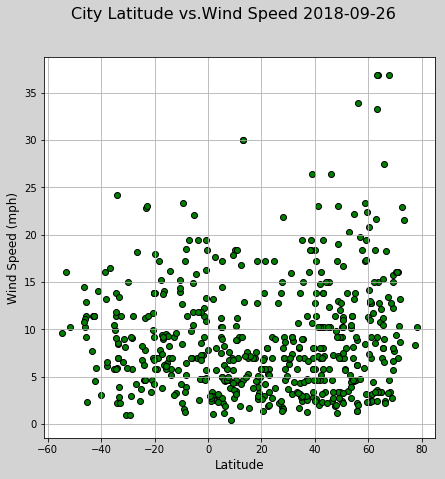

In [10]:
#wind speed vs latitude
weather_scat(3,"windspeed","Wind Speed (mph)","City Latitude vs.Wind Speed "+today,wind_file)
